# Homework 5: SVM

##### TEAM F
Chouliaras Andreas 2143

Pappas Apostolos 2109

\textbf{Exercise 1}  

\textbf{Question a.}

\textbf{1)} We load and plot the dataset:

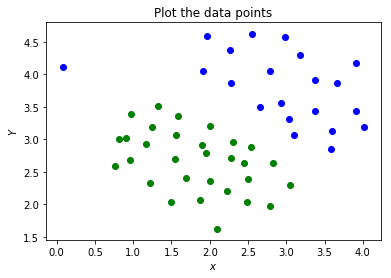

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.sparse import csr_matrix
from sklearn.svm import SVC # "Support vector classifier"

df = pd.read_csv('./ex1Data/twofeature.txt',names=['V1','V2','V3'],header=None,sep=' ')
df['V2'] = df['V2'].str.replace('1:','')
df['V3'] = df['V3'].str.replace('2:','')

df=df.astype(np.float16)

x1= df[df['V1'] == 1].astype(np.float16)
x_1= df[df['V1'] == -1].astype(np.float16)

fig = plt.figure()
plt.scatter(x_1['V2'].values, x_1['V3'].values,color='green')
plt.scatter(x1['V2'].values, x1['V3'].values,color='blue')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')
plt.title(r'Plot the data points')
plt.show()

We see that, although hard, the dataset **is** linearly seperable.

\textbf{2)} Firstly, we set C equal to 1 and we get:

In [12]:
C=1

model = SVC(kernel='linear', C=C)
model.fit(df.drop(['V1'],axis=1), df.drop(['V2','V3'],axis=1).values.ravel())

model.support_vectors_

array([[1.58398438, 3.35742188],
       [2.00976562, 3.203125  ],
       [2.31054688, 2.95898438],
       [2.828125  , 2.63085938],
       [1.31933594, 3.51171875],
       [2.54101562, 2.88671875],
       [3.578125  , 2.85546875],
       [3.10546875, 3.0703125 ],
       [1.91796875, 4.0546875 ],
       [2.65625   , 3.5       ],
       [3.03515625, 3.31640625],
       [0.08642578, 4.10546875]])

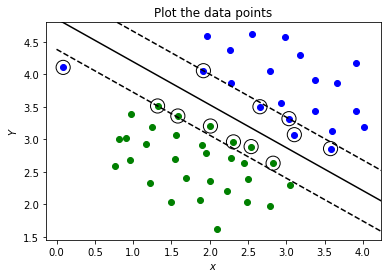

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    '''Plot the decision function for SVC'''
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, 5)
    yy = a * xx - (model.intercept_[0]) / w[1]

    margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=1, facecolors='none',edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig = plt.figure()
plt.scatter(x_1['V2'].values, x_1['V3'].values,color='green')
plt.scatter(x1['V2'].values, x1['V3'].values,color='blue')
plot_svc_decision_function(model)
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')
plt.title(r'Plot the data points')
plt.show()

We see that for C equal to 1 we get a single misclassification and many support vectors are located within the margin limits.

Now Let's see for C value equal to 100:

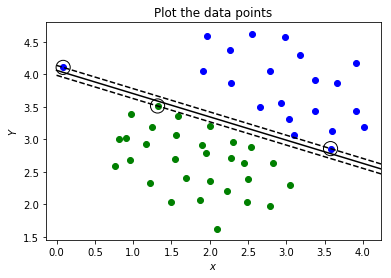

In [14]:
C=100

model = SVC(kernel='linear', C=C,cache_size=5000,shrinking=True)
model.fit(df.drop(['V1'],axis=1), df.drop(['V2','V3'],axis=1).values.ravel())

model.n_support_


fig = plt.figure()
plt.scatter(x_1['V2'].values, x_1['V3'].values,color='green')
plt.scatter(x1['V2'].values, x1['V3'].values,color='blue')
plot_svc_decision_function(model)
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')
plt.title(r'Plot the data points')
plt.show()

We see now that the margin width became a lot smaller and we don't have any misclassified points.


This is due to the fact that during the calculation of the loss function we have a penalty factor for the slackness multiplied by our parameter C. 

This means for small values of C the model becomes more "soft" about getting all samples classified correctly and focuses more to get the general idea of our data which translates to better generalized model,On the other hand as the C parameter gets increased the margins become "harder" which means that the model prefers to classify our samples without any mistakes but with the cost of less success in generalization and more prone to overfitting. 

This is the trade-off between accuracy and generalization.


\textbf{3)} The linear kernel is implemeted as simple as that: 

In [15]:
def linear(X, Y):
    return np.dot(X, Y.T)

We will now see how we plot the margin lines.
We already used it before within a function but let's watch it more carefully here:

To plot the line with a two dimensions dataset we have an equation like this:
$$
b + w_0 x_0 + w_0 x_1 =0
$$
we can express it with respect to $x_1$ to take the line formila we all know:
$$
x_1 =  -\frac{b}{w_1} -\frac{w_0}{w_1} x_0
$$
this looks like $ y= b + ax$

This exactly is how we do it below:

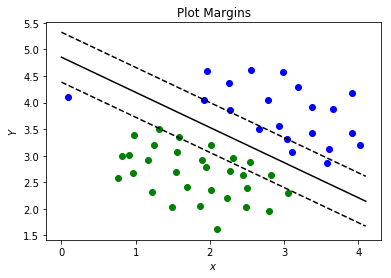

In [16]:
C=1

model = SVC(kernel='linear', C=C,cache_size=5000,shrinking=True)
model.fit(df.drop(['V1'],axis=1), df.drop(['V2','V3'],axis=1).values.ravel())

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 4.1)
yy = a * xx - (model.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
    
fig = plt.figure()
plt.scatter(x_1['V2'].values, x_1['V3'].values,color='green')
plt.scatter(x1['V2'].values, x1['V3'].values,color='blue')

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')
plt.title(r'Plot Margins')
plt.show()

\textbf{__Question b__} 

__1)__  We load the email data:

In [17]:
def load_emails(numTrainDocs):
    numTestDocs = 260;
    numTokens = 2500;

    M = pd.read_csv('ex1Data/emails/train-features-%d.txt' %numTrainDocs,header=None,sep=' ').values
    train_matrix= csr_matrix((M[:,2],(M[:,0]-1,M[:,1]-1)),(numTrainDocs,numTokens)).todense()
    
    train_labels = pd.read_csv('ex1Data/emails/train-labels-%d.txt' %numTrainDocs,header=None,sep=' ').values
    
    M = pd.read_csv('ex1Data/emails/test-features.txt',header=None,sep=' ').values
    test_matrix= csr_matrix((M[:,2],(M[:,0]-1,M[:,1]-1)),(numTestDocs,numTokens)).todense()
    
    test_labels = pd.read_csv('ex1Data/emails/test-labels.txt',header=None,sep=' ').values
    
    return [train_matrix, test_matrix, train_labels, test_labels];

__2)__  We implement the SVM model and train it with various sample numbers (50,100,400,700).<br>
We visualize the weights and calculate the confusion matrix alongside with the accuracy of our model for the aformentioned sample numbers:

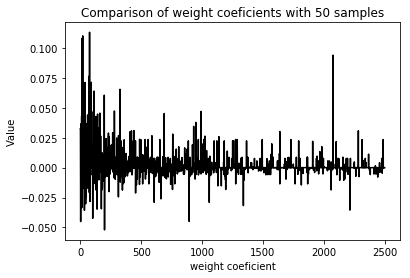

[[113  17]
 [ 47  83]]
Accuracy = 0.7538461538461538


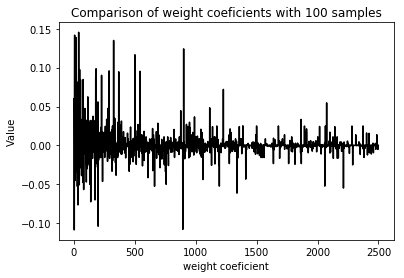

[[120  10]
 [ 20 110]]
Accuracy = 0.8846153846153846


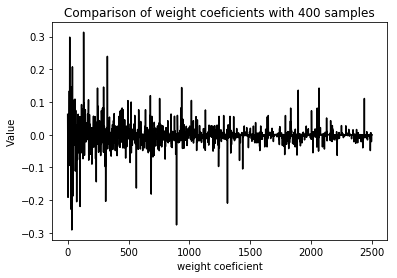

[[127   3]
 [  2 128]]
Accuracy = 0.9807692307692307


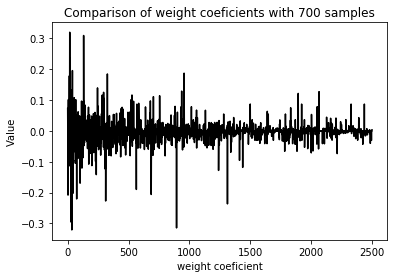

[[128   2]
 [  2 128]]
Accuracy = 0.9846153846153847


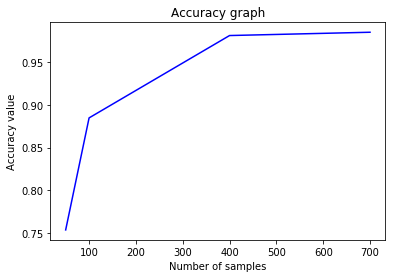

In [18]:
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score

numTrainDocs=(50,100,400,700)
acc_list=[]

for i in numTrainDocs:
    rval=load_emails(i);
    train_matrix=rval[0]
    test_matrix=rval[1]
    train_labels=rval[2]
    test_labels=rval[3]

    C=1
    model = SVC(kernel='linear', C=C,cache_size=5000,shrinking=True)
    model.fit( train_matrix, train_labels.ravel())
    
    weights=(model.coef_)
    plt.plot(range(0,2500), weights.T, 'k')
    plt.xlabel(r'weight coeficient')
    plt.ylabel(r'Value')
    plt.title(r'Comparison of weight coeficients with %d samples' %i)
    plt.show()
    
    predicted_labels = model.predict(test_matrix)

    from sklearn.metrics import confusion_matrix

    print(confusion_matrix(test_labels, predicted_labels))
    acc=accuracy_score(test_labels,predicted_labels)
    print("Accuracy = " + str(acc))
    
    acc_list.append(acc)

plt.plot(numTrainDocs, acc_list, 'b')
plt.xlabel(r'Number of samples')
plt.ylabel(r'Accuracy value')
plt.title(r'Accuracy graph')
plt.show()

__3)__ We can clearly see that as we introduce more samples to our model the accuracy metric increases.<br>

After 400 samples the growth rate is small with only 0.004 increase to the accuracy score as we reach 700 samples.

\textbf{Exercise 2}  

\textbf{Question a.}

\textbf{1)} We load and plot the dataset:

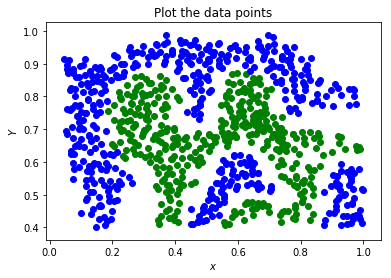

In [47]:
df = pd.read_csv('./ex2Data/ex2a.txt',names=['V1','V2','V3'],header=None,sep=' ')
df['V2'] = df['V2'].str.replace('1:','')
df['V3'] = df['V3'].str.replace('2:','')

df=df.astype(np.float16)

x1= df[df['V1'] == 1].astype(np.float16)
x_1= df[df['V1'] == -1].astype(np.float16)

fig = plt.figure()
plt.scatter(x_1['V2'].values, x_1['V3'].values,color='green')
plt.scatter(x1['V2'].values, x1['V3'].values,color='blue')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')
plt.title(r'Plot the data points')
plt.show()

__2)__ We train the SVM model with C = 1, gamma = 100 
and then we plot the decision boundary.

In [48]:
C=1
gamma=100
X = df.drop(['V1'],axis=1).values
Y = df.drop(['V2','V3'],axis=1).values.ravel()
model = SVC(kernel='rbf', C=C, gamma=gamma)
model.fit(X, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

__3)__ The linear kernel is implemeted as this:

In [49]:
def rbf_kernel(Xi, Xj,gamma):
    Xi = Xi.flatten()
    Xj = Xj.flatten()
    return   np.exp (-gamma * np.linalg.norm(Xi-Xj)**2 )

__4)__ To visualize the decision cost we: 

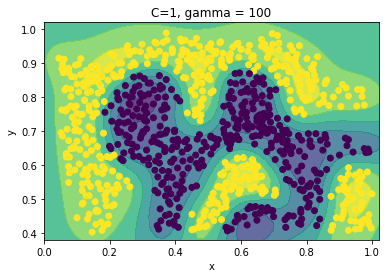

In [53]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = abs( (x_max / x_min)/100 )
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0, 1.02])
plt.ylim([0.38, 1.02])
plt.title("C=%g, gamma = %g"  %(C,gamma))    
plt.show()

\textbf{Question b.}

\textbf{1)} We load and visualize the dataset:

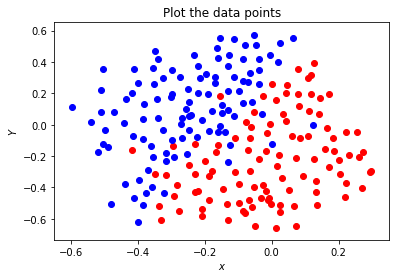

In [28]:
df = pd.read_csv('./ex2Data/ex2b.txt',names=['V1','V2','V3'],header=None,sep=' ')
df['V2'] = df['V2'].str.replace('1:','')
df['V3'] = df['V3'].str.replace('2:','')

df=df.astype(np.float16)

x1= df[df['V1'] == 1].astype(np.float16)
x_1= df[df['V1'] == -1].astype(np.float16)

fig = plt.figure()
plt.scatter(x_1['V2'].values, x_1['V3'].values,color='red')
plt.scatter(x1['V2'].values, x1['V3'].values,color='blue')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y$')
plt.title(r'Plot the data points')
plt.show()

The classes aren't easily seperable, this is very clear. There are a lot of samples that are located deeply in the opposite class. Those points make the classes very hard to seperate with just a simple curve.

__2)__ We train our model and we visualize the decision boundary for every combination of C and gamma values.<br>
$C =1,1000$ and $\gamma = 1,10,100,1000$.<br>
All this is implementes as:

Number of support vectors:
For C=1 and gamma=1 = 
[47 47]
For C=1 and gamma=10 = 
[37 36]
For C=1 and gamma=100 = 
[62 65]
For C=1 and gamma=1000 = 
[104 104]
For C=1000 and gamma=1 = 
[24 23]
For C=1000 and gamma=10 = 
[23 24]
For C=1000 and gamma=100 = 
[42 39]
For C=1000 and gamma=1000 = 
[104 104]


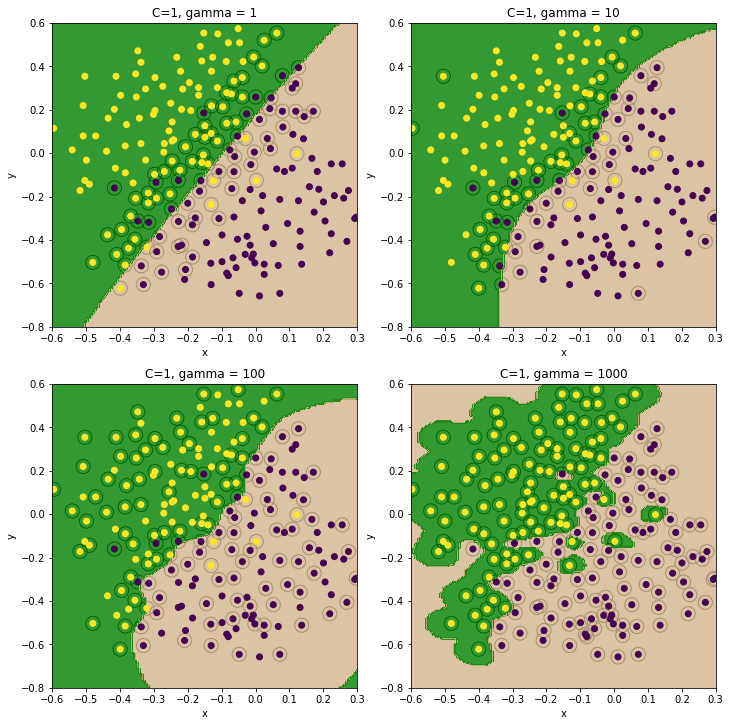

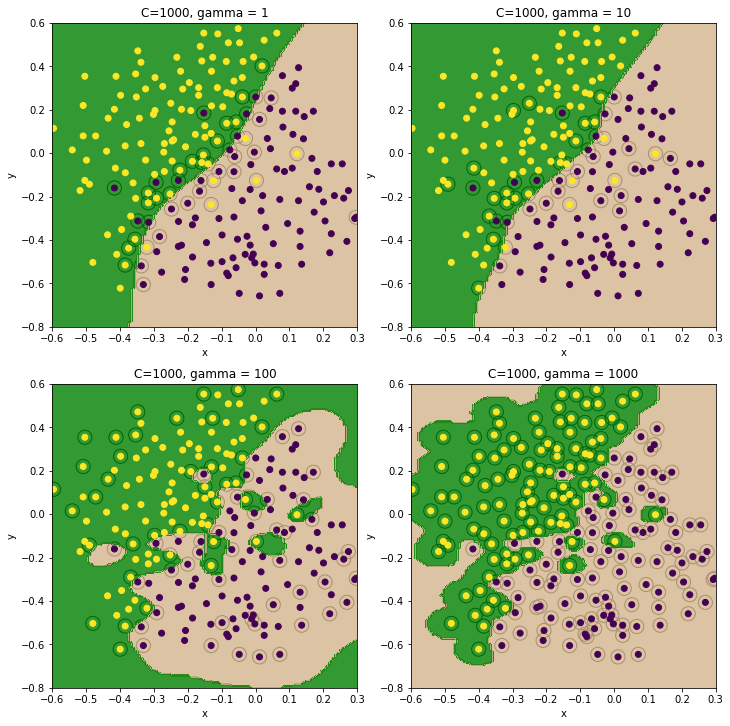

In [237]:
def plotSVM(plt,X,Y,title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = abs( (x_max / x_min)/100 )
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=1, facecolors='none',edgecolors='black');
    
    plt.set_xlabel('x')
    plt.set_ylabel('y')
    plt.set_title(title)
    plt.contourf(xx, yy, Z,colors=('tan','g'), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.set_xlim([-0.6, 0.3])
    plt.set_ylim([-0.8, 0.6])

C=(1,1000)
gamma=(1,10,100,1000)

ax=[0,0,0,0]

print('Number of support vectors:')
for i in range(0,len(C)):
    fig, ((ax[0], ax[1]), (ax[2], ax[3])) = plt.subplots(nrows=2, ncols=2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    for j in range(0,len(gamma)):
        X = df.drop(['V1'],axis=1).values
        Y = df.drop(['V2','V3'],axis=1).values.ravel()
        model = SVC(kernel='rbf', C=C[i], gamma=gamma[j])
        model.fit(X, Y)
        print('For C=%g and gamma=%g = ' %(C[i],gamma[j]))
        print(model.n_support_)
        plotSVM(ax[j],X,Y,'C=%g, gamma = %g'  %(C[i],gamma[j]))
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Firstly let's comment on the plots.<br>
For small values of the gamma parameter we see that:<br>

As support vectors are used points near the decision boundary. This means that for small values the model is influenced only by the nearest points to the decision boundary.<br>

For small values of gamma the curve looks rather simple whereas later for great values the pattern of the decision boundary look more intricate.<br>

Moreover as gamma increases more and more support vectors appear that are located further from the decision boundary up to the point where all points are used as support vectors.

About the C parameter we can't see any significant pattern that explains the difference in the plots. 

To understand better what happens we must look at the numbers of the support vectors. We can clearly see that between C=1 and C=1000 the initial number of support vectors is smaller for the greater C value.

We already know that for great values of C the model focuses more on making correct classifications and ignores generalization.
This is confirmed by the fact that for C=1000 only the nearest points are selected as support vectors.

Finally, It is undeniable that as C and gamma achieve great values we have overfitting which can be noticed from the final two graphs for both values of C, graphs (3,4,7,8).

It is important to select proper values to our parameters C and gamma to avoid overfitting and to generate models that generalizes well for new datas.

__Question c.__

__1)__ We split our data into 3 sets for cross-validation, and then we perform 3-fold cross-validation for various combinations of C and gamma values.

We selected both C and gamma parameters to take the following range of values: 0.1 , 1 , 10 , 100.

__2)__ We then, calculate the accuracy scores and print the parameters that produced the highest accuracy.

The following code implements the ideas above:

In [61]:
from sklearn.model_selection import KFold 

kf = KFold(n_splits=3, shuffle=True, random_state=1) 

X = df.drop(['V1'],axis=1).values
y = df.drop(['V2','V3'],axis=1).values.ravel()

C = (0.1,1,10,100)
gamma = (0.1,1,10,100)
max_acc = 0
cmax = 0
gmax = 0
for c in C:
    for g in gamma:        
        acc=[]
        for train_index, test_index in kf.split(X):
            model = SVC(kernel='rbf', C=c, gamma=g)
            model.fit(X, y)

            train_data, test_data = X[train_index], X[test_index] 
            train_labels, test_labels = y[train_index], y[test_index]

            predicted_labels = model.predict(test_data)
            acc.append(accuracy_score(test_labels,predicted_labels))
        avg_acc=np.mean(acc)
        print('C=%-5g, gamma = %-5g  with acc= %g ' %(c,g,avg_acc))
        if (avg_acc>max_acc):
            max_acc=avg_acc
            cmax=c
            gmax=g
print('\nMax accuracy: %-6g  with C=%-5g and gamma = %-5g' %(max_acc,cmax,gmax))


C=0.1  , gamma = 0.1    with acc= 0.55614 
C=0.1  , gamma = 1      with acc= 0.522539 
C=0.1  , gamma = 10     with acc= 0.827337 
C=0.1  , gamma = 100    with acc= 0.977997 
C=1    , gamma = 0.1    with acc= 0.55614 
C=1    , gamma = 1      with acc= 0.808778 
C=1    , gamma = 10     with acc= 0.882993 
C=1    , gamma = 100    with acc= 0.997685 
C=10   , gamma = 0.1    with acc= 0.666288 
C=10   , gamma = 1      with acc= 0.826171 
C=10   , gamma = 10     with acc= 0.946707 
C=10   , gamma = 100    with acc= 0.996528 
C=100  , gamma = 0.1    with acc= 0.808782 
C=100  , gamma = 1      with acc= 0.834301 
C=100  , gamma = 10     with acc= 0.969875 
C=100  , gamma = 100    with acc= 0.998843 

Max accuracy: 0.998843  with C=100   and gamma = 100  


We see that this is indeed the best C and gamma values, that produce the model with the highest accuracy based on the range of values we tried.